# Dataset Analysis: **Sales Conversion Optimization**

### **Etapa 1 - Entendimento do Problema**

**Conteúdo:** Os dados utilizados nesse projeto são referentes a uma campanha de publicidade em mídias sociais de uma organização anônima (XYZ).

**Objetivo:** Melhorar a conversão de vendas da empresa a partir da análise de campanhas realizadas no Facebook.

**Dataset:** https://www.kaggle.com/loveall/clicks-conversion-tracking

##### Importando bibliotecas de interesse:

In [59]:
# Importação e Manipulação do .CSV
import pandas as pd

# Visualização dos Dados
import missingno   # https://github.com/ResidentMario/missingno
import matplotlib.pyplot as plt
import seaborn as sns

### **Etapa 2 - Análise, Interpretação e Visualização de Dados**

##### **Carregando o dataset:**

In [31]:
# Criando uma variável que recebe o dataframe
df = pd.read_csv("KAG_conversion_data.csv")
type(df)

pandas.core.frame.DataFrame

##### **Primeira inspeção:**

In [32]:
df.head() # 5 primeiras linhas do dataframe (default)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [33]:
df.tail() # 5 últimas linhas do dataframe (default)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2
1142,1314415,1178,179982,45-49,F,114,513161,114,165.609999,5,2


In [34]:
df.columns # Lista todas as colunas do dataframe

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [35]:
df.shape # tuple

(1143, 11)

In [36]:
linhas, colunas = df.shape # Número de linhas e colunas do dataframe
print(f"Número de linhas: {linhas}")
print(f"Número de colunas: {colunas}")

Número de linhas: 1143
Número de colunas: 11


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


Observações:
- Nota-se que esse dataframe é um conjunto sem dados faltantes - ou seja, todas as colunas (_features_) possuem valores para cada uma das 1143 linhas do dataframe.
- Conforme o esperado, as únicas features compostas por dados do tipo _object_ são as de idade (pois estão categorizadas como intervalos) e gênero.

##### **Dicionário de Dados:**

Padronizando o nome das colunas para melhor entendimento e manipulação dos dados:

In [38]:
df.rename(columns={"ad_id":"id_anuncio","xyz_campaign_id":"id_campanha","fb_campaign_id":"id_fb_campanha","age":"idade","gender":"genero","interest":"interesse","Impressions":"numero_exibicoes","Clicks":"cliques","Spent":"valor_pago_anuncio","Total_Conversion":"conversao","Approved_Conversion":"compras"}, inplace=True)

Temos, portanto, o dicionário:

- _**id_anuncio**_: ID única de cada anúncio.
- _**id_campanha**_: ID associada a cada anúncio da empresa XYZ.
- _**id_fb_campanha**_: ID associada a como o Facebook identifica cada campanha.
- _**idade**_: idade da pessoa a qual o anúncio é entregue.
- _**genero**_: gênero da pessoa a qual o anúncio é entregue (M - masculino, F - feminino).
- _**interesse**_: um código que especifica a categoria de interesse da pessoa (conforme mencionado no perfil público da pessoa dentro do Facebook).
- _**numero_exibicoes**_: o número de vezes que o anúncio foi exibido.
- _**cliques**_: número de cliques no anúncio.
- _**valor_pago_anuncio**_: quantia paga ao Facebook (pela empresa XYZ) pela exibição do anúncio.
- _**conversao**_: Número total de pessoas que perguntaram sobre o produto após visualizar do anúncio.
- _**compras**_: Número total de pessoas que compraram o produto após visualizar o anúncio.

##### **Informações estatísticas:**

Informações estatísticas gerais sobre o nosso dataframe:

In [39]:
df.describe(exclude=['O']) # exclude='O' exclui informações para dados não-numéricos.

,id_anuncio,id_campanha,id_fb_campanha,interesse,numero_exibicoes,cliques,valor_pago_anuncio,conversao,compras
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


É importante ressaltar que as features _id_anuncio_, _id_campanha_, _id_fb_campanha_ e _interesse_ não são relevantes para realização de análise estatística, por serem identificadores.

A avaliação estatística só possui relevância para as features _numero_exibicoes_, _cliques_, _valor_pago_anuncio_, _conversao_ e _compras_.

In [40]:
df.describe(include=['O']) # include='O' limita o método às features compostas por strings.

,idade,genero
count,1143,1143
unique,4,2
top,30-34,M
freq,426,592


##### **Dados faltantes:**

Como já foi possível notar pela primeira inspeção, esse dataframe não possui dados faltantes.

De qualquer forma, podemos confirmar e documentar essa informação por outros meios:

In [60]:
df.isnull()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques,valor_pago_anuncio,conversao,compras
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1138,False,False,False,False,False,False,False,False,False,False,False
1139,False,False,False,False,False,False,False,False,False,False,False
1140,False,False,False,False,False,False,False,False,False,False,False
1141,False,False,False,False,False,False,False,False,False,False,False


Verificando todo o dataframe por meio de contagem:

In [41]:
df.isnull().sum()

id_anuncio            0
id_campanha           0
id_fb_campanha        0
idade                 0
genero                0
interesse             0
numero_exibicoes      0
cliques               0
valor_pago_anuncio    0
conversao             0
compras               0
dtype: int64

Verificando por meio de visualização:

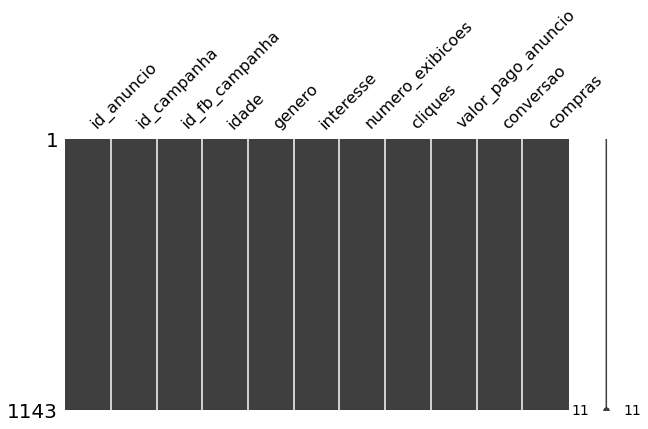

In [73]:
missingno.matrix(df,figsize=(10,5))

##### **Verificação de outliers (valores discrepantes):**

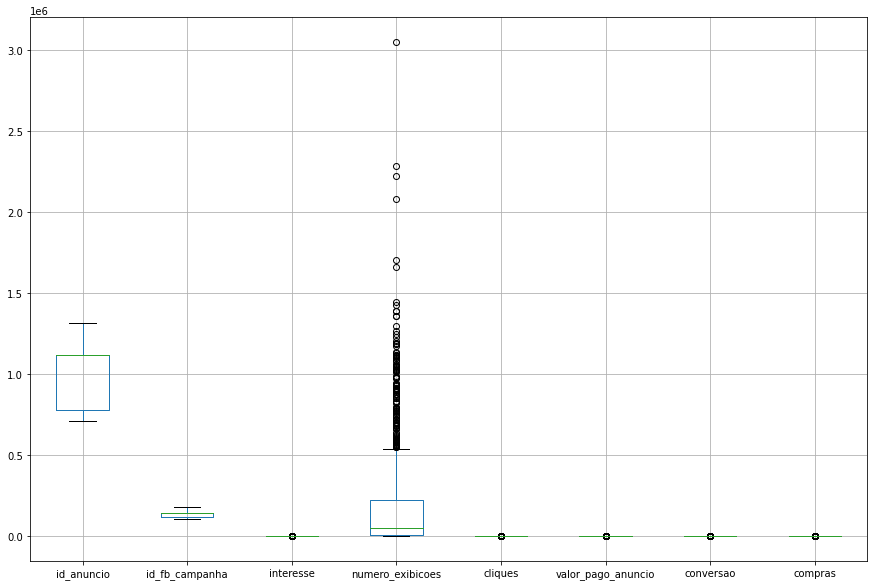

In [80]:
plt.figure(figsize=(15,10))
df.boxplot()
plt.show()

##### **Duplicatas:**

In [44]:
df[df.duplicated()]

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques,valor_pago_anuncio,conversao,compras


In [45]:
len(df.duplicated())

1143

Vemos, portanto, que não há dados duplicados no nosso dataframe.

##### **Matrizes de Correlação:**

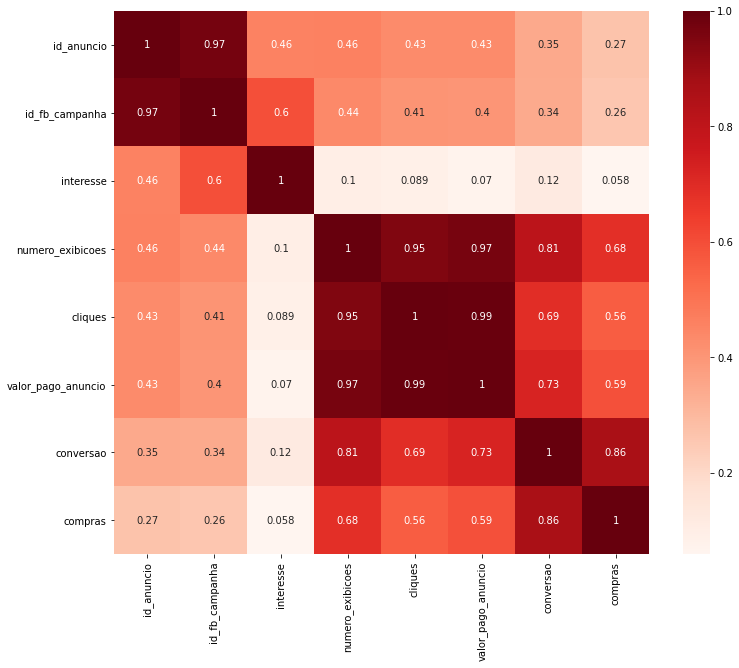

In [84]:
plt.figure(figsize=(12,10))
corr_matrix = df.corr() # salvando a correlação em uma variável para criarmos o heatmap a seguir
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

### **Etapa 3 - Inteligência Artificial**

#### **Avaliação de _features_ (colunas)**

##### 1. _**id_campanha**_ - ID associada a cada anúncio da empresa XYZ

In [47]:
# Número de IDs distintas especificadas no dataframe
df["id_campanha"].nunique()

3

In [48]:
# Listagem de todas as IDs distintas presentes no dataframe
df["id_campanha"].unique()

array([ 916,  936, 1178])

Vamos renomear os valores únicos de cada campanha existente no dataframe para facilitar a leitura e entendimento dos dados. Dessa forma, teremos:

- *ID 916: "campanha_1"*
- *ID 936: "campanha_2"*
- *ID 1178: "campanha_3"*

In [49]:
df["id_campanha"].replace({916:"campanha_1", 936: "campanha_2", 1178: "campanha_3"}, inplace=True)

In [50]:
df.head()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques,valor_pago_anuncio,conversao,compras
0,708746,campanha_1,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campanha_1,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campanha_1,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campanha_1,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campanha_1,103928,30-34,M,28,4133,1,1.29,1,1


In [51]:
df.tail()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques,valor_pago_anuncio,conversao,compras
1138,1314410,campanha_3,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,campanha_3,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,campanha_3,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,campanha_3,179981,45-49,F,113,790253,135,198.710000,8,2
1142,1314415,campanha_3,179982,45-49,F,114,513161,114,165.609999,5,2


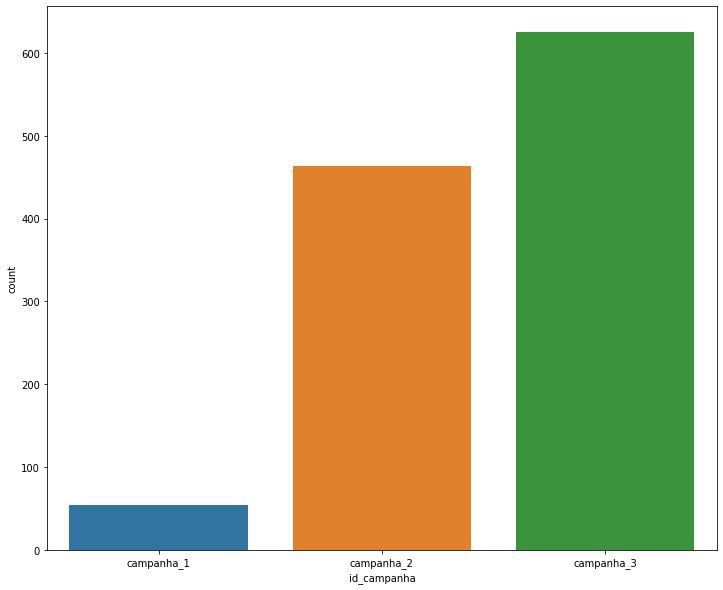

In [52]:
plt.figure(figsize=(12,10))
sns.countplot(x="id_campanha", data=df)
plt.show()

Podemos observar que *campanha_3* possui um maior número de anúncios (instâncias no dataframe).

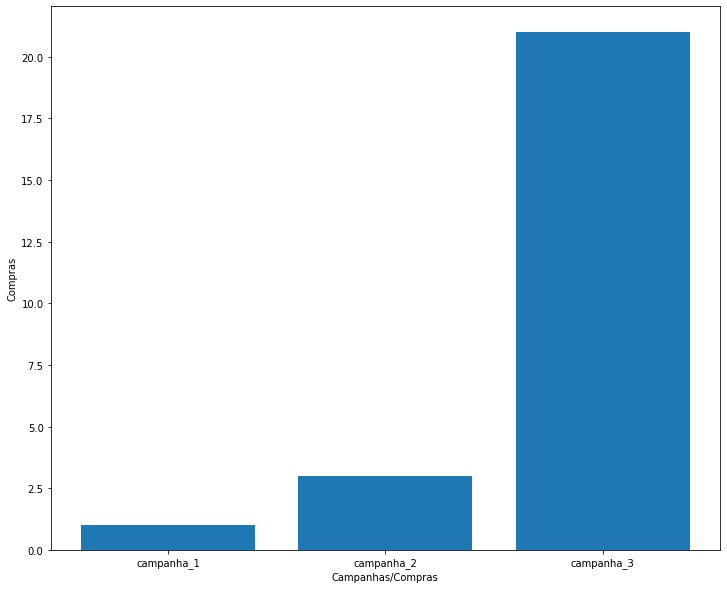

In [53]:
plt.figure(figsize=(12,10))
plt.bar(df["id_campanha"], df["compras"])
plt.ylabel("Compras")
plt.xlabel("Campanhas/Compras")
plt.show()

##### 2. _**idade**_ - idade da pessoa a qual o anúncio é entregue.

In [54]:
df["idade"].nunique()

4

In [55]:
df["idade"].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

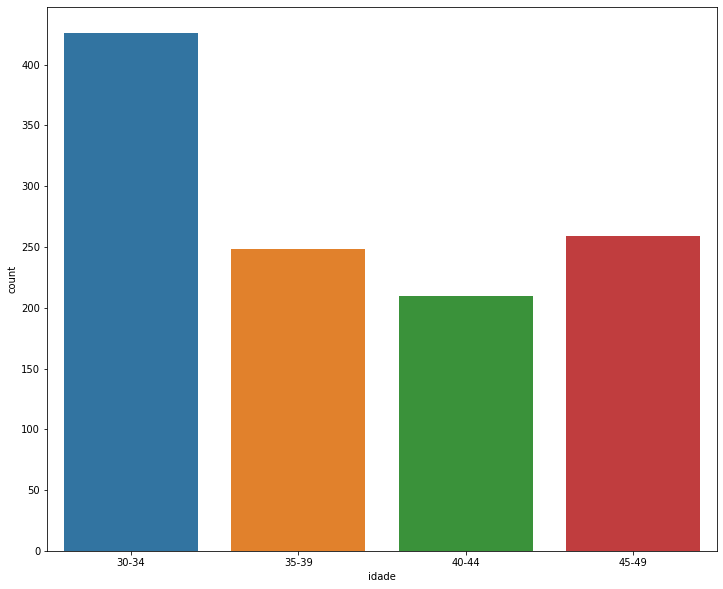

In [56]:
plt.figure(figsize=(12,10))
sns.countplot(x = "idade", data=df)
plt.show()

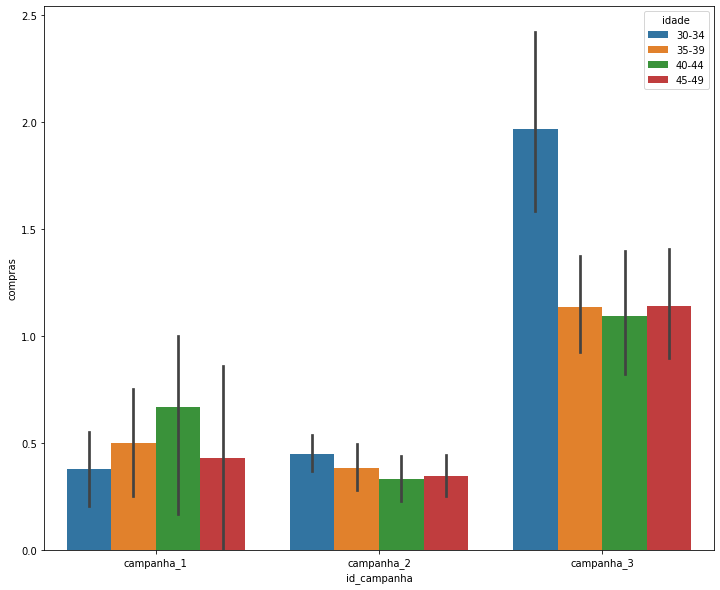

In [57]:
plt.figure(figsize=(12,10))
tips = sns.load_dataset("tips")
sns.barplot(x=df["id_campanha"], y=df["compras"], hue=df["idade"], data=tips)
plt.show()

##### 3. _**genero**_ - gênero da pessoa a qual o anúncio é entregue.